In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Jash1005/MACHINE-LEARNING/refs/heads/main/Outlier/placement.csv')

<ipython-input-4-9b194dfd54c4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

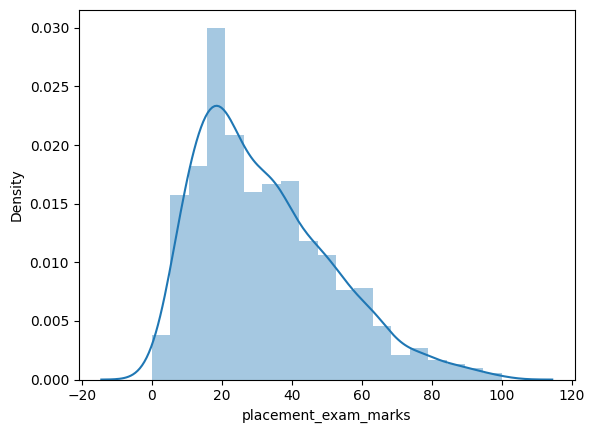

In [4]:
#iqr on skewed curve => placement

sns.distplot(df['placement_exam_marks'])

In [5]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


In [6]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)
print(percentile25,percentile75)

iqr = percentile75 - percentile25
print(iqr)

17.0 44.0
27.0


In [7]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print(upper_limit,lower_limit)

84.5 -23.5


In [8]:
df[(df['placement_exam_marks'] > upper_limit) | (df['placement_exam_marks'] <lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


<Axes: ylabel='placement_exam_marks'>

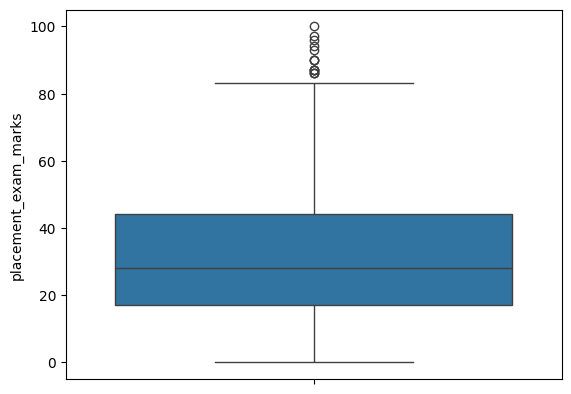

In [10]:
sns.boxplot(df['placement_exam_marks'])

<Axes: >

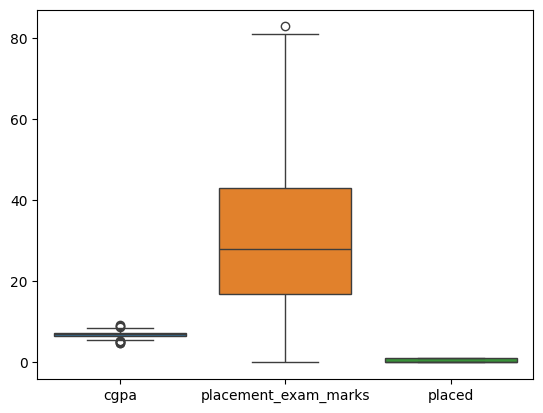

In [11]:
#truncating

truncated_df = df[(df['placement_exam_marks'] < upper_limit) & (df['placement_exam_marks'] >lower_limit)]

sns.boxplot(truncated_df)

In [14]:
#capping

df.loc[(df['placement_exam_marks'] > upper_limit),'placement_exam_marks'] = upper_limit
df.loc[(df['placement_exam_marks'] < lower_limit),'placement_exam_marks'] = lower_limit

df.describe()

#sns.distplot(df['placement_exam_marks'])

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.136500,0.489000
std,0.615898,18.865419,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,84.500000,1.000000
